In [ ]:
#Step 1: Import all dependencies
#Step 2: Read data, normalize 
#Step 3: Apply Decision Tree RFECV with CV = 5 folds
        #Plot the CV score with number of features
#Step 4: Visualize how many and which features are being filtered
#Step 5: Filter out features
        #Apply algorithms 
        #Use metrics : Accuracy, mean score, std, G-mean score, precision, recall and F-score

#Repeat step 3,4 and 5 for each subsets. 

In [6]:
# Keep all of your imports here

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [2]:
# Reading data properly
df = pd.read_csv("pd_speech_features.csv", header=1)

X = df.drop(["class"], axis=1)
y = df["class"]

min_max_scaler = MinMaxScaler()
xScaled = min_max_scaler.fit_transform(X)

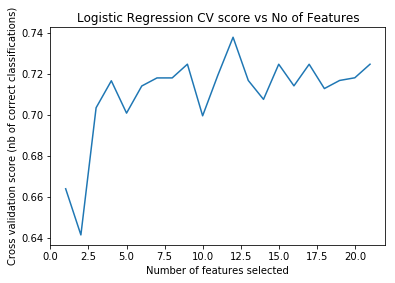

In [3]:
#RFECV 
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,2:23], y)
#plot of numbers of features vs cross validation score 
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [4]:
#important features
Features = df.iloc[:,2:23]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['PPE', 'DFA', 'numPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locAbsJitter', 'ppq5Jitter', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'meanAutoCorrHarmonicity', 'meanHarmToNoiseHarmonicity']


12

In [7]:
#algorithms apply 
X_rfecv=rfecv.transform(xScaled[:,2:23])
def calculateAlogorithmAccuracy(model):
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, confusion_matrix
    import numpy as np
    import numpy as np
    from sklearn import metrics
    #from imblearn.metrics import geometric_mean_score           //Installation of library for gmean failed
    from sklearn.metrics.cluster import fowlkes_mallows_score     #calculates gmean score
    
    skf = StratifiedKFold(n_splits=5, random_state=None)
    testac = []
    # # X is the feature set and y is the target
    for train_index, test_index in skf.split(X_rfecv,y): 
        X_train, X_test = X_rfecv[train_index], X_rfecv[test_index] 
        y_train, y_test = y[train_index], y[test_index]
    
        clf = model
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        testac.append(accuracy_score(y_test, preds))
        
    results = model_selection.cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print('Accuracy of classifier on test set: {:.2f}'
     .format(accuracy_score(y_test, preds)))
    print("mean and std on training = ",(results.mean(),results.std()))
    print("mean and std on test",(np.mean(testac), np.std(testac)))
    classreport = classification_report(y_test, preds)
    print("G-mean score = ",fowlkes_mallows_score(y_test, preds, sparse=False))
    #print(imblearn.metrics.geometric_mean_score(y_test, preds))
    print(classreport)
    

calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())


Accuracy of classifier on test set: 0.47
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.5329900081329151, 0.07013314663012406)
G-mean score =  0.5594194388325667
             precision    recall  f1-score   support

          0       0.26      0.61      0.37        38
          1       0.76      0.42      0.54       112

avg / total       0.63      0.47      0.50       150

Accuracy of classifier on test set: 0.71
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7643814337167422, 0.046004089637533406)
G-mean score =  0.6666583629616869
             precision    recall  f1-score   support

          0       0.42      0.39      0.41        38
          1       0.80      0.81      0.81       112

avg / total       0.70      0.71      0.70       150

Accuracy of classifier on test set: 0.75
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7737582200534449

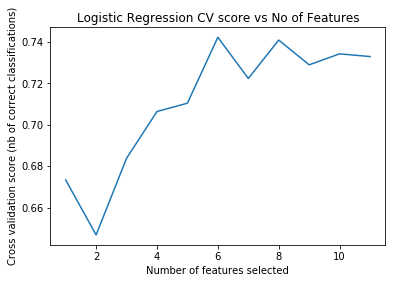

In [8]:
#RFECV 
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,23:34], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [9]:
Features = df.iloc[:,23:34]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['minIntensity', 'meanIntensity', 'f1', 'f3', 'f4', 'b1']


6

In [10]:
X_rfecv=rfecv.transform(xScaled[:,23:34])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())


Accuracy of classifier on test set: 0.71
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.6680673870105729, 0.07217117132955371)
G-mean score =  0.6367109245565696
             precision    recall  f1-score   support

          0       0.45      0.68      0.54        38
          1       0.87      0.71      0.78       112

avg / total       0.76      0.71      0.72       150

Accuracy of classifier on test set: 0.76
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.768486580690136, 0.024218512288371328)
G-mean score =  0.7101373122667738
             precision    recall  f1-score   support

          0       0.53      0.47      0.50        38
          1       0.83      0.86      0.84       112

avg / total       0.75      0.76      0.76       150

Accuracy of classifier on test set: 0.73
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7513023120715696,

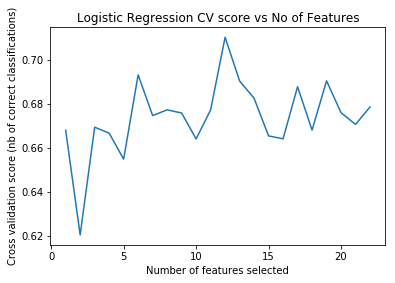

In [11]:
#RFECV 
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,34:56], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
Features = df.iloc[:,34:56]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['GQ_std_cycle_open', 'GNE_mean', 'GNE_std', 'GNE_SNR_SEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_NSR_SEO']


12

In [13]:
X_rfecv=rfecv.transform(xScaled[:,34:56])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.70
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7208382711746253, 0.03364311265867274)
G-mean score =  0.6912724847900482
             precision    recall  f1-score   support

          0       0.35      0.21      0.26        38
          1       0.76      0.87      0.81       112

avg / total       0.66      0.70      0.67       150

Accuracy of classifier on test set: 0.73
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7275485070291623, 0.03467204625486732)
G-mean score =  0.6971405116740267
             precision    recall  f1-score   support

          0       0.47      0.37      0.41        38
          1       0.80      0.86      0.83       112

avg / total       0.72      0.73      0.72       150

Accuracy of classifier on test set: 0.75
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7697672824445219,

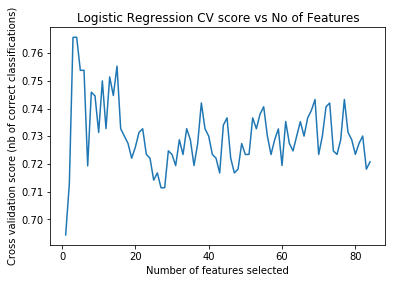

In [14]:

#RFECV 
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,56:140], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
Features = df.iloc[:,56:140]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['mean_MFCC_2nd_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_10th_coef', 'std_delta_delta_log_energy']


4

In [16]:
X_rfecv=rfecv.transform(xScaled[:,56:140])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.79
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.8055644243057977, 0.03609458954337476)
G-mean score =  0.727128197716433
             precision    recall  f1-score   support

          0       0.58      0.58      0.58        38
          1       0.86      0.86      0.86       112

avg / total       0.79      0.79      0.79       150

Accuracy of classifier on test set: 0.73
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7988624375508306, 0.05844692685605526)
G-mean score =  0.6634399759369369
             precision    recall  f1-score   support

          0       0.47      0.58      0.52        38
          1       0.84      0.78      0.81       112

avg / total       0.75      0.73      0.74       150

Accuracy of classifier on test set: 0.81
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.810906355292204, 0

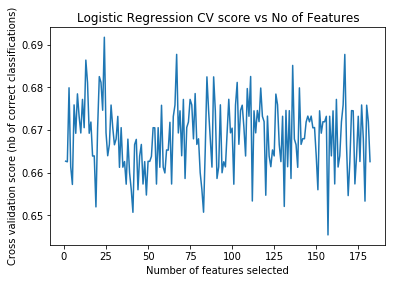

In [17]:
#RFECV 
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,140:322], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [18]:
Features = df.iloc[:,140:322]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['Ed_2_coef', 'Ed_3_coef', 'Ed_4_coef', 'det_entropy_shannon_5_coef', 'det_entropy_shannon_6_coef', 'det_entropy_shannon_7_coef', 'det_entropy_log_1_coef', 'det_entropy_log_2_coef', 'det_entropy_log_3_coef', 'det_entropy_log_4_coef', 'det_entropy_log_5_coef', 'det_TKEO_mean_4_coef', 'app_entropy_shannon_4_coef', 'app_det_TKEO_mean_5_coef', 'app_TKEO_std_3_coef', 'Ed2_5_coef', 'det_LT_entropy_shannon_1_coef', 'det_LT_entropy_shannon_8_coef', 'det_LT_entropy_log_7_coef', 'det_LT_entropy_log_10_coef', 'det_LT_TKEO_mean_2_coef', 'det_LT_TKEO_mean_6_coef', 'det_LT_TKEO_std_4_coef', 'det_LT_TKEO_std_7_coef']


24

In [19]:
X_rfecv=rfecv.transform(xScaled[:,140:322])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.73
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.6718146857209248, 0.15097499585868734)
G-mean score =  0.7462375126781315
             precision    recall  f1-score   support

          0       0.33      0.08      0.13        38
          1       0.75      0.95      0.84       112

avg / total       0.65      0.73      0.66       150

Accuracy of classifier on test set: 0.66
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.72349529452771, 0.04358243271110761)
G-mean score =  0.6546816585487619
             precision    recall  f1-score   support

          0       0.28      0.21      0.24        38
          1       0.75      0.81      0.78       112

avg / total       0.63      0.66      0.64       150

Accuracy of classifier on test set: 0.74
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.7526183339142559, 0

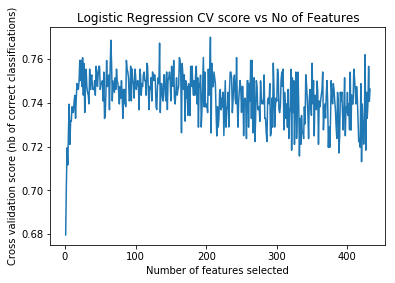

In [20]:
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,322:754], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [21]:
Features = df.iloc[:,322:754]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

['tqwt_energy_dec_9', 'tqwt_energy_dec_10', 'tqwt_energy_dec_11', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_14', 'tqwt_energy_dec_15', 'tqwt_energy_dec_16', 'tqwt_energy_dec_17', 'tqwt_energy_dec_18', 'tqwt_energy_dec_19', 'tqwt_energy_dec_20', 'tqwt_energy_dec_21', 'tqwt_energy_dec_22', 'tqwt_energy_dec_23', 'tqwt_energy_dec_24', 'tqwt_energy_dec_25', 'tqwt_energy_dec_26', 'tqwt_energy_dec_27', 'tqwt_energy_dec_28', 'tqwt_energy_dec_29', 'tqwt_energy_dec_30', 'tqwt_energy_dec_31', 'tqwt_energy_dec_32', 'tqwt_energy_dec_33', 'tqwt_energy_dec_34', 'tqwt_energy_dec_35', 'tqwt_energy_dec_36', 'tqwt_entropy_shannon_dec_1', 'tqwt_entropy_shannon_dec_2', 'tqwt_entropy_shannon_dec_3', 'tqwt_entropy_shannon_dec_4', 'tqwt_entropy_shannon_dec_5', 'tqwt_entropy_shannon_dec_6', 'tqwt_entropy_shannon_dec_7', 'tqwt_entropy_shannon_dec_8', 'tqwt_entropy_shannon_dec_9', 'tqwt_entropy_shannon_dec_10', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon

206

In [22]:
X_rfecv=rfecv.transform(xScaled[:,322:754])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())

Accuracy of classifier on test set: 0.71
mean and std on training =  (0.7163899153943402, 0.05328746184368358)
mean and std on test (0.7486529568955501, 0.03857036878381059)
G-mean score =  0.6367109245565696
             precision    recall  f1-score   support

          0       0.45      0.68      0.54        38
          1       0.87      0.71      0.78       112

avg / total       0.76      0.71      0.72       150

Accuracy of classifier on test set: 0.77
mean and std on training =  (0.8050375204092599, 0.04579629183465891)
mean and std on test (0.7989416753805043, 0.025963199954376615)
G-mean score =  0.7365439363157746
             precision    recall  f1-score   support

          0       0.58      0.39      0.47        38
          1       0.81      0.90      0.86       112

avg / total       0.75      0.77      0.76       150

Accuracy of classifier on test set: 0.83
mean and std on training =  (0.722165757313638, 0.045167709551344665)
mean and std on test (0.8386864180318346

In [ ]:
dtc_model = DecisionTreeClassifier()
rfecv = RFECV(estimator=dtc_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(xScaled[:,2:754], y)
plt.figure()
plt.title('DT CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
Features = df.iloc[:,2:754]
feature_importance = list(zip(Features, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)
len(new_features)

In [ ]:
X_rfecv=rfecv.transform(xScaled[:,2:754])
calculateAlogorithmAccuracy(GaussianNB())
calculateAlogorithmAccuracy(RandomForestClassifier(n_estimators=10, random_state=0))
calculateAlogorithmAccuracy(LogisticRegression(solver='liblinear', multi_class='ovr'))
calculateAlogorithmAccuracy(DecisionTreeClassifier())